In [3]:
import os
os.environ["LOGLEVEL"] = "PROD"

import numpy as np
import pandas as pd
from neuro_dmt.models.bluebrain.circuit.model import BlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light\
    import circuit_composition, circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit

In [4]:
mock_circuit =\
    MockCircuit.build(
        circuit_composition,
        circuit_connectivity)
circuit_model =\
    BlueBrainCircuitModel(
        mock_circuit,
        label="BlueBrainCircuitModelMock")
conn_prob = circuit_model.connection_probability

In [6]:
pre_synaptic_cells =\
    circuit_model.cells\
                 .sample(n=100)\
                 .rename(columns=conn_prob._at("pre_synaptic"))
post_synaptic_cells =\
    circuit_model.cells\
                 .sample(n=100)\
                 .rename(columns=conn_prob._at("post_synaptic"))
conn_prob.get_summary(
    pre_synaptic_cell_group=pre_synaptic_cells,
    post_synaptic_cell_group=post_synaptic_cells)

pairs_total               10000.0000
pairs_connected             172.0000
connection_probability        0.0172
Name: 0, dtype: float64

In [7]:
from neuro_dmt.models.bluebrain.circuit.model.pathway import\
    ConnectionProbabilityBySomaDistance
conn_prob_sd = ConnectionProbabilityBySomaDistance(circuit_model=circuit_model)

In [8]:
conn_prob_sd(
    pre_synaptic_cell_group=pre_synaptic_cells,
    post_synaptic_cell_group=post_synaptic_cells)

soma_distance
(0.0, 100.0)        0.033742
(100.0, 200.0)      0.019302
(200.0, 300.0)      0.014825
(300.0, 400.0)      0.013834
(400.0, 500.0)      0.015873
(500.0, 600.0)      0.022919
(600.0, 700.0)      0.015796
(700.0, 800.0)      0.024590
(800.0, 900.0)      0.011024
(900.0, 1000.0)     0.012868
(1000.0, 1100.0)    0.019108
(1100.0, 1200.0)    0.012077
(1200.0, 1300.0)    0.006173
(1300.0, 1400.0)    0.050633
(1400.0, 1500.0)    0.000000
(1500.0, 1600.0)    0.010526
(1600.0, 1700.0)    0.000000
(1700.0, 1800.0)    0.031250
(1800.0, 1900.0)    0.000000
Name: connection_probability, dtype: float64

In [9]:
pairs = conn_prob_sd.get_pairs(
    pre_synaptic_cells=pre_synaptic_cells,
    post_synaptic_cells=post_synaptic_cells)
pairs_df = pd.concat([df for df in pairs])

In [10]:
pre_synaptic_group_columns = ["pre_synaptic_mtype"]
post_synaptic_group_columns = ["post_synaptic_mtype"]
result = pairs_df[
    ["pairs", "soma_distance"] + pre_synaptic_group_columns + post_synaptic_group_columns
].groupby(
    pre_synaptic_group_columns
    + post_synaptic_group_columns
    + ["soma_distance"]
).agg(["size", "sum"])
result.head()

pairs     
                                                       size  sum
pre_synaptic_mtype post_synaptic_mtype soma_distance            
L1_SLAC            L1_DAC              (100.0, 200.0)     2  0.0
                                       (200.0, 300.0)     1  0.0
                   L23_ChC             (100.0, 200.0)     1  0.0
                                       (200.0, 300.0)     1  0.0
                   L23_MC              (100.0, 200.0)     1  0.0

In [11]:
result = pairs_df[
    ["pairs"]
].assign(
    group=0
).groupby(
    ["group"]
).agg(
    ["sum", "size"]
).pairs.rename(
    columns=conn_prob.columns
)
conn_prob.definition(result.loc[0])

0.0172

In [12]:
result = pairs_df[
    ["soma_distance"] + ["pairs"]
].assign(
    group=0
).groupby(
    ["group", "soma_distance"]
).agg(
    ["sum", "size"]
).pairs.rename(
    columns=conn_prob.columns
)
conn_prob.definition(result.loc[0])

soma_distance
(0.0, 100.0)        0.033742
(100.0, 200.0)      0.019302
(200.0, 300.0)      0.014825
(300.0, 400.0)      0.013834
(400.0, 500.0)      0.015873
(500.0, 600.0)      0.022919
(600.0, 700.0)      0.015796
(700.0, 800.0)      0.024590
(800.0, 900.0)      0.011024
(900.0, 1000.0)     0.012868
(1000.0, 1100.0)    0.019108
(1100.0, 1200.0)    0.012077
(1200.0, 1300.0)    0.006173
(1300.0, 1400.0)    0.050633
(1400.0, 1500.0)    0.000000
(1500.0, 1600.0)    0.010526
(1600.0, 1700.0)    0.000000
(1700.0, 1800.0)    0.031250
(1800.0, 1900.0)    0.000000
dtype: float64

In [13]:
result = pairs_df[
    ["soma_distance"] + ["pairs"]
].assign(group=0
).groupby(
    ["group", "soma_distance"]
).agg(
    ["sum", "size"]
).pairs.rename(
    columns=conn_prob.columns
).assign(
    **{conn_prob.phenomenon: conn_prob.definition}
).loc[0][
    conn_prob_sd.measurement_label
]
result

soma_distance
(0.0, 100.0)        0.033742
(100.0, 200.0)      0.019302
(200.0, 300.0)      0.014825
(300.0, 400.0)      0.013834
(400.0, 500.0)      0.015873
(500.0, 600.0)      0.022919
(600.0, 700.0)      0.015796
(700.0, 800.0)      0.024590
(800.0, 900.0)      0.011024
(900.0, 1000.0)     0.012868
(1000.0, 1100.0)    0.019108
(1100.0, 1200.0)    0.012077
(1200.0, 1300.0)    0.006173
(1300.0, 1400.0)    0.050633
(1400.0, 1500.0)    0.000000
(1500.0, 1600.0)    0.010526
(1600.0, 1700.0)    0.000000
(1700.0, 1800.0)    0.031250
(1800.0, 1900.0)    0.000000
Name: connection_probability, dtype: float64

In [15]:
result = pairs_df[
    ["pairs", "soma_distance"]
].groupby(
    ["soma_distance"]
).agg(
    ["sum", "size"]
).pairs.rename(
    columns=conn_prob_sd.columns
).assign(**{
    conn_prob_sd.phenomenon: conn_prob_sd.definition})
result[
    conn_prob_sd.phenomenon
].head()

soma_distance
(0.0, 100.0)      0.033742
(100.0, 200.0)    0.019302
(200.0, 300.0)    0.014825
(300.0, 400.0)    0.013834
(400.0, 500.0)    0.015873
Name: connection_probability, dtype: float64

In [16]:
result = pairs_df[
    ["pairs"]
].agg(
    conn_prob.aggregators
).pairs.rename(
    columns=conn_prob.columns
)
result

size    10000
sum       172
dtype: int64

In [17]:
result = pairs_df[
    ["pairs", "soma_distance"]
].groupby(
    ["soma_distance"]
).agg(
    ["sum", "size"]
).pairs.rename(
    columns=conn_prob.columns
).assign(**{
    conn_prob_sd.phenomenon: conn_prob_sd.definition})

result[conn_prob_sd.measurement_label]


soma_distance
(0.0, 100.0)        0.033742
(100.0, 200.0)      0.019302
(200.0, 300.0)      0.014825
(300.0, 400.0)      0.013834
(400.0, 500.0)      0.015873
(500.0, 600.0)      0.022919
(600.0, 700.0)      0.015796
(700.0, 800.0)      0.024590
(800.0, 900.0)      0.011024
(900.0, 1000.0)     0.012868
(1000.0, 1100.0)    0.019108
(1100.0, 1200.0)    0.012077
(1200.0, 1300.0)    0.006173
(1300.0, 1400.0)    0.050633
(1400.0, 1500.0)    0.000000
(1500.0, 1600.0)    0.010526
(1600.0, 1700.0)    0.000000
(1700.0, 1800.0)    0.031250
(1800.0, 1900.0)    0.000000
Name: connection_probability, dtype: float64

In [18]:
from neuro_dmt.models.bluebrain.circuit.model.pathway import GroupByVariables

result_dataframe_groupby = conn_prob_sd(
    pre_synaptic_cell_group=circuit_model.cells.sample(n=100),
    post_synaptic_cell_group=circuit_model.cells.sample(n=100),
    groupby=GroupByVariables(frozenset({"mtype",}), frozenset({"mtype",})))

In [19]:
from neuro_dmt.models.bluebrain.circuit.model.cell_type import CellType
result_series = conn_prob_sd(
    pathway=CellType.pathway(
        {"mtype": "L6_UPC"},
        {"mtype": "L6_TPC:A"}))

In [20]:
result_series.apply(
    lambda x: x + np.random.uniform())

soma_distance
(0.0, 100.0)      0.047830
(100.0, 200.0)    0.454107
(200.0, 300.0)    0.845948
(300.0, 400.0)    0.307415
(400.0, 500.0)    0.829429
(500.0, 600.0)    0.327472
(600.0, 700.0)    0.023862
Name: connection_probability, dtype: float64

In [21]:
from dmt.data.observation.measurement.collection import series_type, primitive_type
measured_values = series_type([
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L23_MC"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L23_MC"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L23_MC"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L23_MC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L6_UPC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L6_UPC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform())),
    ({"pre_synaptic_mtype": "L6_UPC", "post_synaptic_mtype": "L6_TPC:A"},
     result_series.apply(lambda x: x + 0.01 * np.random.uniform()))]
).rename(columns={"value": "connection_probability"})

In [23]:
from dmt.data.observation import measurement
measured_data = measurement.get_summary(measured_values).reset_index()

In [24]:
from neuro_dmt.models.bluebrain.circuit.test.test_connectome_analysis import *
phenomenon = Phenomenon(
    "Connection Probability",
    """
    Probability that two neurons in a pathway are connected.
    While mostly interested in `mtype->mtype` pathways, we can define
    a pathway as the group of connected neurons with pre-synaptic and
    post-synaptic neurons belonging to two parametrically defined groups.
    As an example consider neuron populations defined by not only `mtype`
    but also by soma-distance from a given location.
    """,
    group="Connectome")
number_pathways = 5
pathways =\
    mock_circuit_model.pathways(frozenset(("mtype",)))\
        .sample(n=number_pathways)
analysis_test = BlueBrainCircuitAnalysisTest(
    analysis=BrainCircuitAnalysis(
    phenomenon=phenomenon,
    AdapterInterface=ConnectionProbabilityInterface,
    measurement_parameters=Parameters(pathways),
    plotter=HeatMap(
        xvar=("pre_synaptic", "mtype"),
        xlabel="pre-mtype",
        yvar=("post_synaptic", "mtype"),
        ylabel="post-mtype",
        vvar=("connection_probability", "mean"))))

connection_probability_measurement =\
    analysis_test.test_get_measurement(mock_circuit_model, sample_size=10)

analysis = analysis_test._circuit_analysis_test.analysis
adapter = analysis_test.adapter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')


KeyboardInterrupt: 

In [25]:
m = connection_probability_measurement["BlueBrainCircuitModelMockLight"]
m.groupby(m.index.names).agg(["size", "mean", "std"])

NameError: name 'connection_probability_measurement' is not defined

In [26]:
adapter.get_connection_probability(
    mock_circuit_model,
    pre_synaptic={"mtype": "L23_MC"},
    post_synaptic={"mtype": "L23_MC"})

NameError: name 'adapter' is not defined

In [ ]:
def _join(parameters_measurement, value_measurement):
    """..."""
    parameters_measurement = pd.Series(parameters_measurement)
    return\
            pd.Series(
                parameters_measurement)\
              .append(
                  pd.Series({"value": value_measurement}))

In [ ]:
parameter_values = analysis.measurement_parameters.for_sampling(size=2)
measured_values = np.random.uniform(size=len(parameter_values))
pd.concat([
    _join(*args)
    for args in zip(parameter_values, measured_values)])

In [ ]:
analysis.measurement_parameters.join(
    analysis.measurement_parameters.as_dataframe(parameter_values),
    pd.DataFrame({"connection_probability": measured_values}))

In [191]:
pd.testing.assert_frame_equal(
    measurement.concat_as_samples(
        {"x": measured_values}).loc["x"],
    measured_values)

In [28]:
from dmt.tk.parameters import index_tree
pd.Series(index_tree.as_unnested_dict(parameter_values[0]))

NameError: name 'parameter_values' is not defined

In [29]:
plotting_data = measured_values.loc[
    ("L23_MC",)
].reset_index(
).assign(
    soma_distance = lambda df:[np.mean(sd) for sd in df.soma_distance]
)
plotting_data.head()

,post_synaptic_mtype,soma_distance,connection_probability
0,L23_MC,50.0,0.017729
1,L23_MC,150.0,0.019613
2,L23_MC,250.0,0.024482
3,L23_MC,350.0,0.029382
4,L23_MC,450.0,0.017740


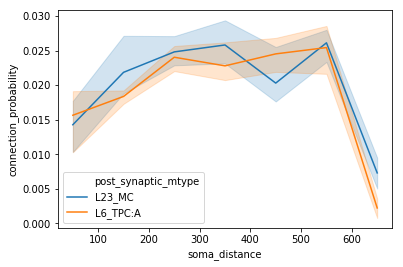

In [30]:
import seaborn; seaborn.set
axes = seaborn.lineplot(
    y="connection_probability",
    x="soma_distance",
    hue="post_synaptic_mtype",
    data=plotting_data)

In [31]:
plotting_data =\
    measured_values.reset_index(
    ).assign(
        soma_distance=lambda df: df.soma_distance.apply(np.mean)
    )
plotting_data.head()

,pre_synaptic_mtype,post_synaptic_mtype,soma_distance,connection_probability
0,L23_MC,L23_MC,50.0,0.017729
1,L23_MC,L23_MC,150.0,0.019613
2,L23_MC,L23_MC,250.0,0.024482
3,L23_MC,L23_MC,350.0,0.029382
4,L23_MC,L23_MC,450.0,0.017740


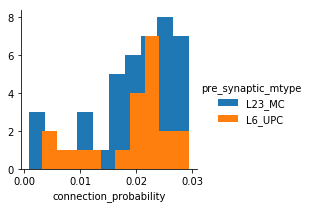

In [32]:
import matplotlib.pyplot as plt
graphic =\
    seaborn.FacetGrid(
        plotting_data,
        col=None,#"post_synaptic_mtype",
        hue="pre_synaptic_mtype")
graphic.map(plt.hist, "connection_probability")
graphic.add_legend()

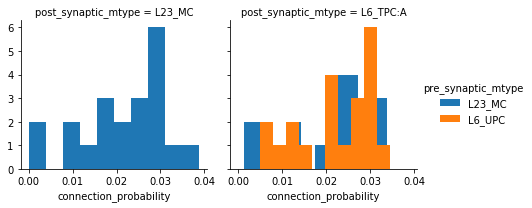

In [174]:
graphic =\
    seaborn.FacetGrid(
        plotting_data,
        hue="pre_synaptic_mtype",
        col="post_synaptic_mtype")
graphic.map(plt.hist, "connection_probability")
graphic.add_legend()

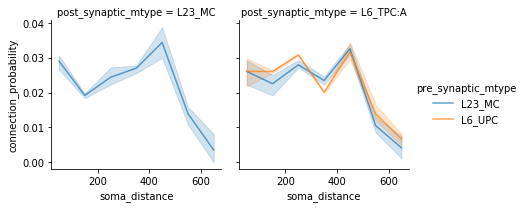

In [182]:
graphic =\
    seaborn.FacetGrid(
        plotting_data,
        col="post_synaptic_mtype",
        hue="pre_synaptic_mtype")
        #legend_out=True)
graphic.map(
    seaborn.lineplot, 
    "soma_distance",
    "connection_probability",
    alpha=0.7)
graphic.add_legend()

In [37]:
from dmt.tk.plotting.lines import LinePlot
line_plot = LinePlot(
    xvar="soma_distance",
    xlabel="Soma Distance",
    yvar="connection_probability",
    ylabel="Connection Probability",
    gvar="pre_synaptic_mtype",
    fvar="post_synaptic_mtype")

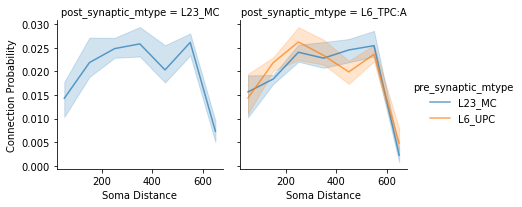

In [38]:
line_plot.get_figure({
    "0": measured_values.reset_index().assign(
        soma_distance=lambda df: df.soma_distance.apply(np.mean)
    ).set_index(
        ["pre_synaptic_mtype", "post_synaptic_mtype", "soma_distance"])})

In [52]:
result = conn_prob_sd(
    pathway=CellType.pathway(
        {"mtype": "L23_MC"},
        {"mtype": "L23_MC"}))
result

soma_distance
(0.0, 100.0)      0.025287
(100.0, 200.0)    0.018037
(200.0, 300.0)    0.025399
(300.0, 400.0)    0.015253
(400.0, 500.0)    0.013953
Name: connection_probability, dtype: float64

In [55]:
result.reset_index(
).assign(
    soma_distance=lambda df: df.soma_distance.apply(np.mean)
).set_index(
    "soma_distance"
).connection_probability

soma_distance
50.0     0.025287
150.0    0.018037
250.0    0.025399
350.0    0.015253
450.0    0.013953
Name: connection_probability, dtype: float64

In [51]:
result

soma_distance
(0.0, 100.0)      0.023829
(100.0, 200.0)    0.017747
(200.0, 300.0)    0.024104
(300.0, 400.0)    0.013789
(400.0, 500.0)    0.008230
Name: connection_probability, dtype: float64